In [1]:
## Importing the libraries
import numpy
import keras
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING THE DATASET

In [2]:
(X_train , y_train) ,(X_test , y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
print("X_train : " , X_train.shape)
print("X_test : " , X_test.shape )
print("y_train : ", y_train.shape)
print("y_test " , y_test.shape)

X_train :  (60000, 28, 28)
X_test :  (10000, 28, 28)
y_train :  (60000,)
y_test  (10000,)


In [4]:
type(X_train)

numpy.ndarray

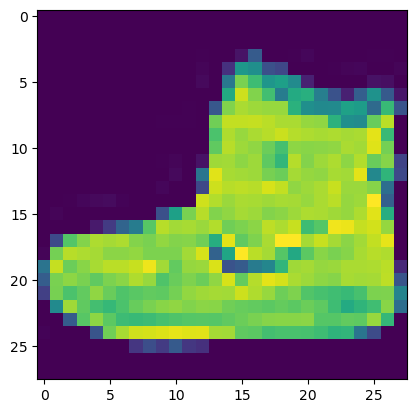

In [5]:
image = X_train[0]
plt.imshow(image )
plt.show()

In [6]:
y_train[0]

9

In [7]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

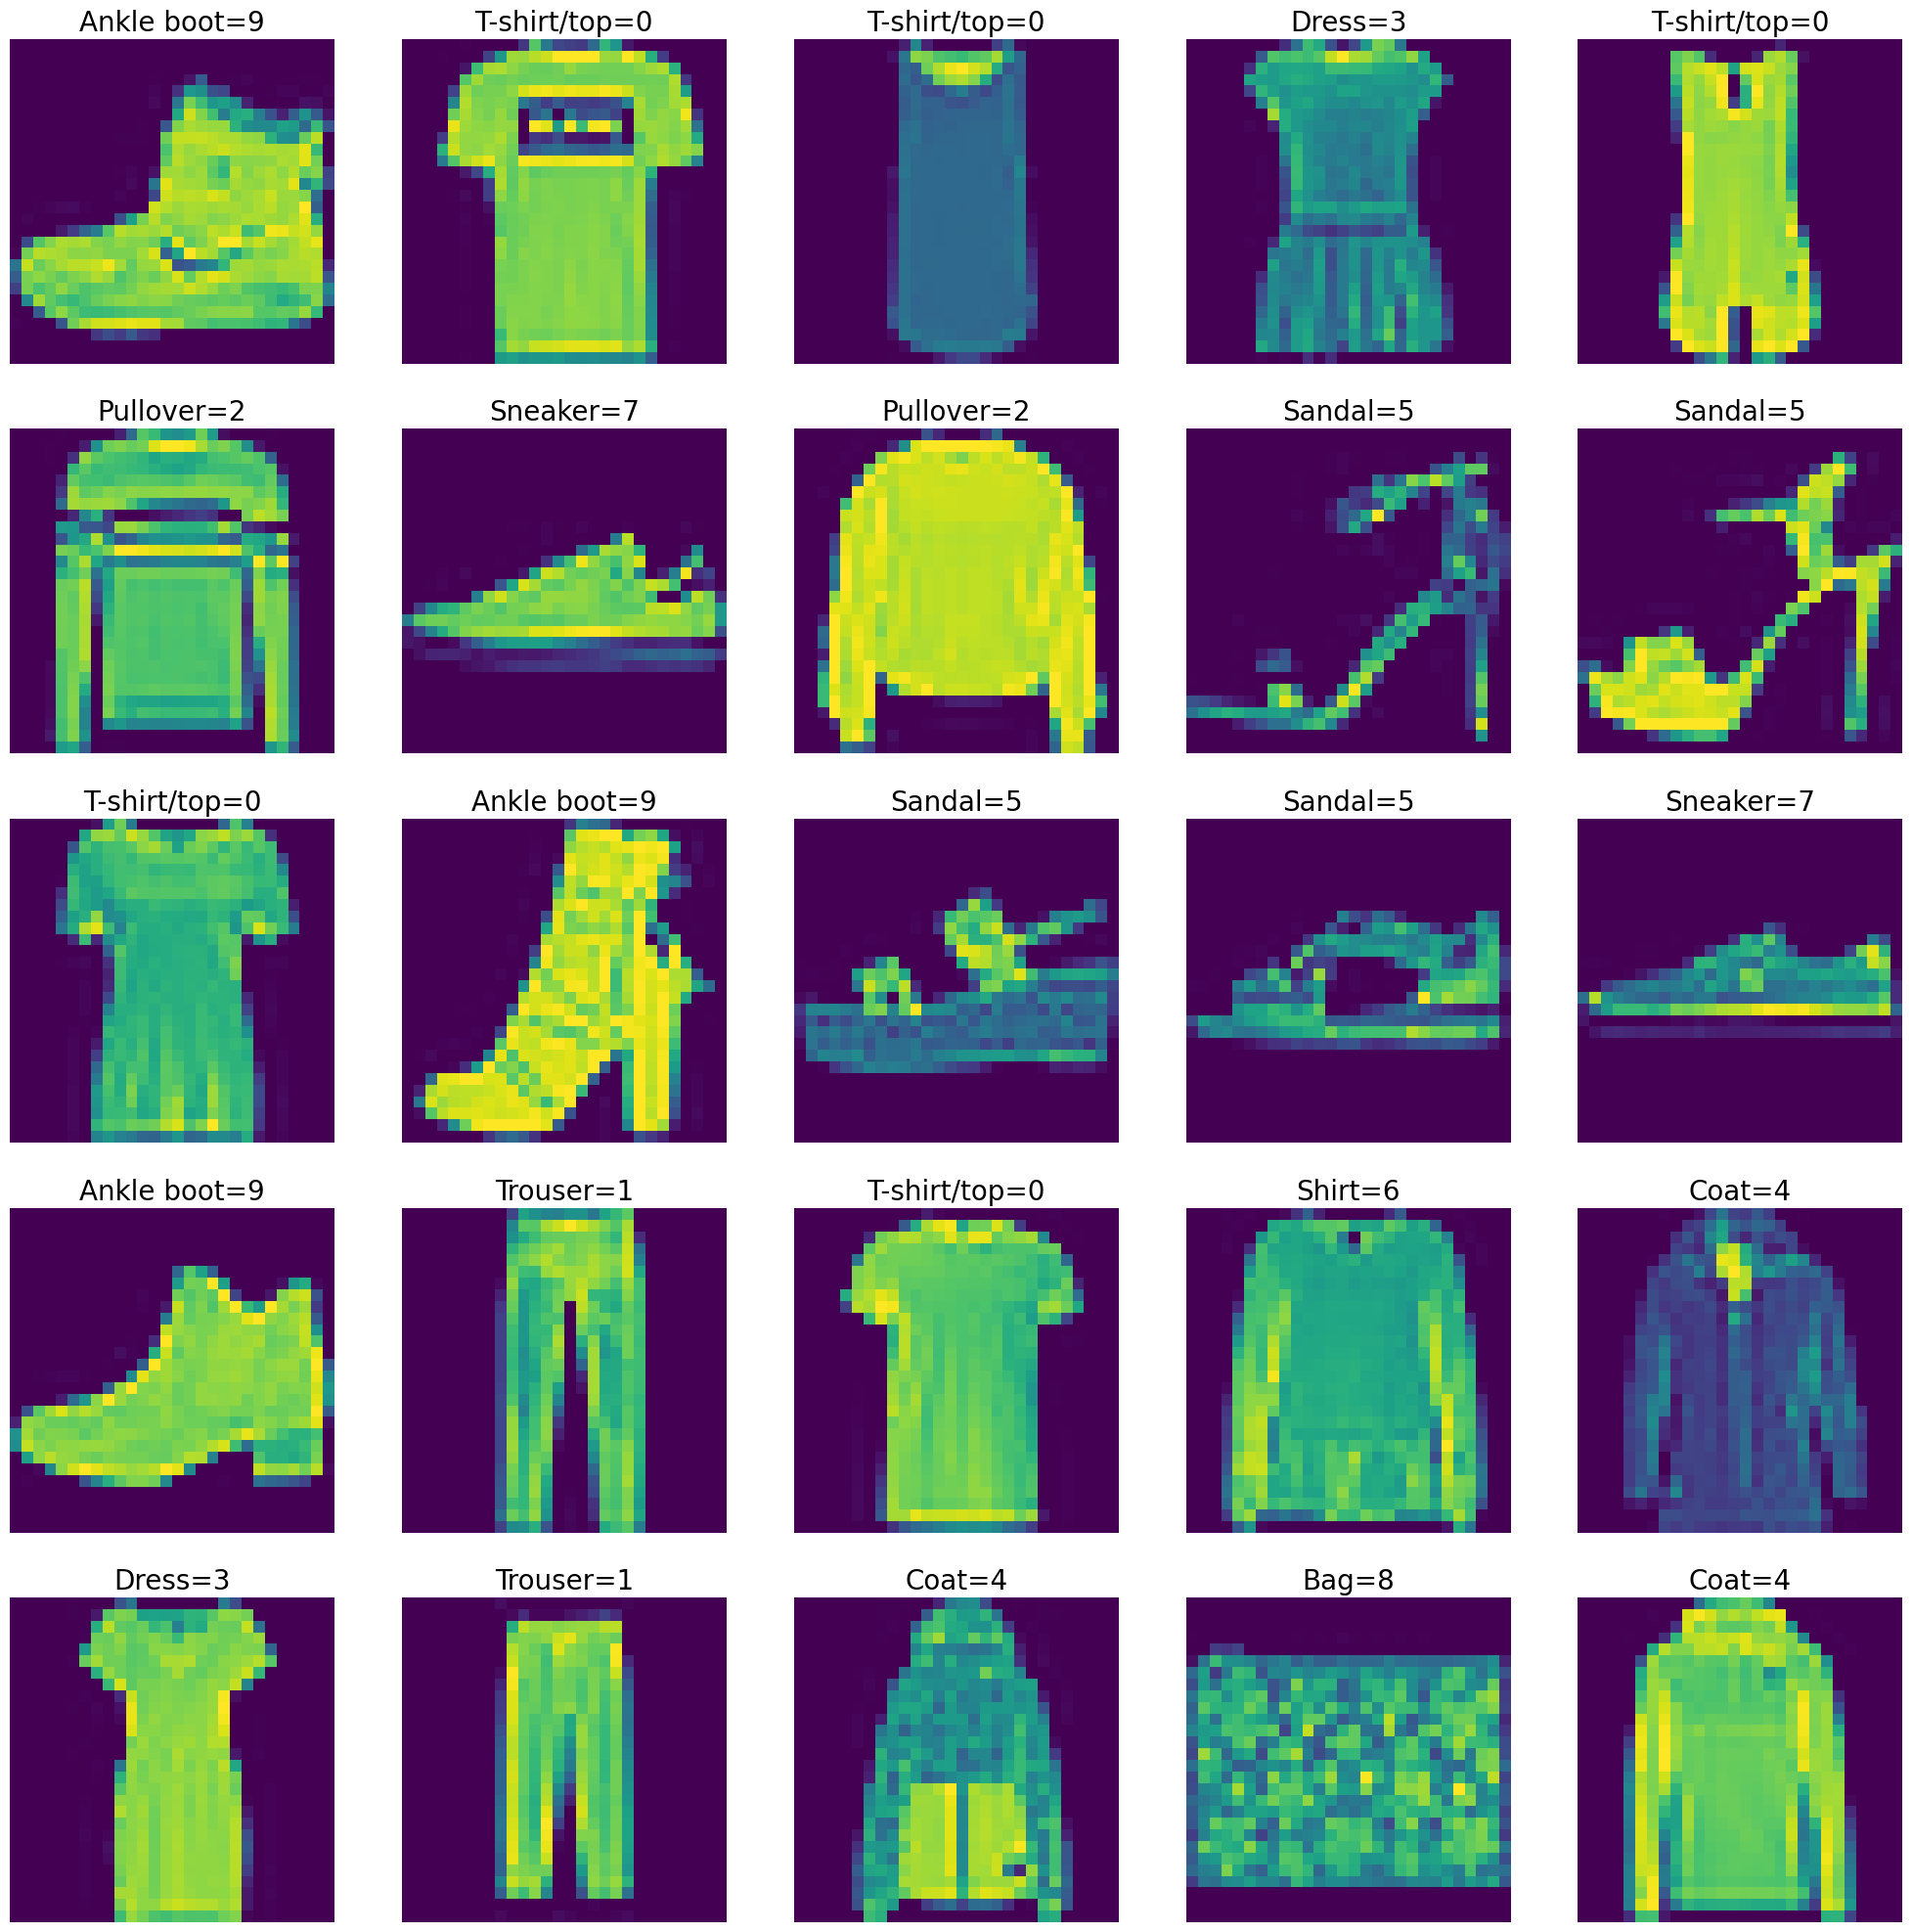

In [8]:
## Plotting the first 25 images 
plt.figure(figsize = (25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.axis("off")
    plt.title(class_labels[y_train[i]]+"="+str(y_train[i]) , fontsize=20)

# FEATURE SCALING

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# BUILDING THE NEURAL NETWORK

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense



In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Define model
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 image into a 1D vector

    Dense(512, kernel_regularizer=l2(0.0005)),  # First hidden layer
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.3),

    Dense(256, kernel_regularizer=l2(0.0005)),  # Second hidden layer
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.0005)),  # Third hidden layer
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.0005)),  # Fourth hidden layer
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.3),

    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile model with Adam optimizer and learning rate scheduler
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate scheduler (reduce LR when validation loss plateaus)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', patience=7, restore_best_weights=True, verbose=1
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% data for validation
    epochs=100, batch_size=256,  # Larger batch size improves stability
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Model Summary
model.summary()


Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6976 - loss: 1.4864 - val_accuracy: 0.8324 - val_loss: 0.9264 - learning_rate: 0.0010
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8309 - loss: 0.9113 - val_accuracy: 0.8537 - val_loss: 0.7440 - learning_rate: 0.0010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8473 - loss: 0.7569 - val_accuracy: 0.8527 - val_loss: 0.6625 - learning_rate: 0.0010
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8507 - loss: 0.6698 - val_accuracy: 0.8582 - val_loss: 0.6027 - learning_rate: 0.0010
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8555 - loss: 0.6097 - val_accuracy: 0.8518 - val_loss: 0.5922 - learning_rate: 0.0010
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8609 - loss: 0.5604 - val_accuracy: 0.8665 - val_loss: 0.5264 - learning_rate: 0.0010
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8613 - l

Epoch 40/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9204 - loss: 0.2814 - val_accuracy: 0.8942 - val_loss: 0.3572 - learning_rate: 6.2500e-05
Epoch 41/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9198 - loss: 0.2817 - val_accuracy: 0.8969 - val_loss: 0.3519 - learning_rate: 6.2500e-05
Epoch 42/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9223 - loss: 0.2750 - val_accuracy: 0.8953 - val_loss: 0.3517 - learning_rate: 6.2500e-05
Epoch 43/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9199 - loss: 0.2749 - val_accuracy: 0.8948 - val_loss: 0.3542 - learning_rate: 6.2500e-05
Epoch 44/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9215 - loss: 0.2695 - val_accuracy: 0.8931 - val_loss: 0.3601 - learning_rate: 6.2500e-05
Epoch 45/100
184/188 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9252 - loss: 0.2651
Epoch 45: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/st

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,832 (6.61 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 1,153,942 (4.40 MB)

# EVALUATION OF THE NEURAL NETWORK

In [61]:
model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.3785


[0.37383806705474854, 0.8906000256538391]

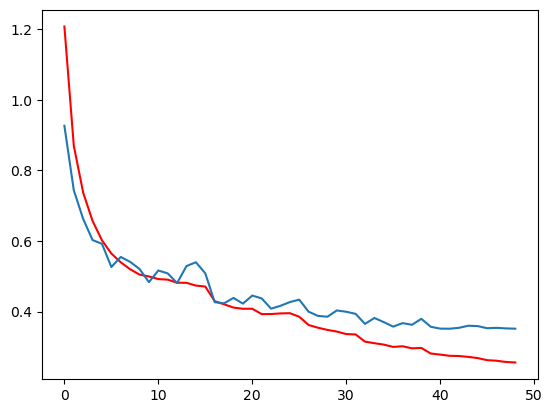

In [62]:
plt.plot(history.history['loss'],color="red")
plt.plot(history.history['val_loss'])
plt.show()

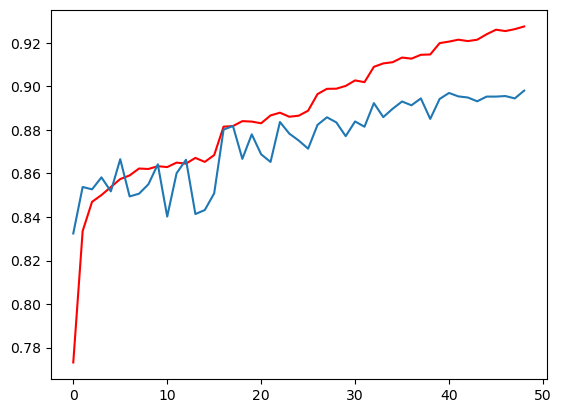

In [63]:
plt.plot(history.history['accuracy'],color="red")
plt.plot(history.history['val_accuracy'])
plt.show()

# PREDICTION

In [64]:
y_log = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [65]:
y_log

array([[3.1535940e-06, 8.6207399e-07, 1.8453492e-06, ..., 1.5578081e-03,
        1.0488449e-05, 9.9745756e-01],
       [1.2634502e-05, 2.8758695e-09, 9.9866128e-01, ..., 3.6160761e-09,
        1.2520756e-09, 2.8493097e-11],
       [1.1017020e-06, 9.9999845e-01, 1.0048033e-07, ..., 2.2545498e-08,
        1.2735035e-08, 5.2797783e-10],
       ...,
       [1.5338628e-03, 2.6271678e-07, 3.1603340e-04, ..., 8.7931619e-07,
        9.9764061e-01, 4.4715240e-08],
       [3.4358598e-07, 9.9998343e-01, 4.1438565e-07, ..., 3.7534758e-07,
        5.4131217e-08, 5.1592206e-08],
       [3.5142224e-07, 6.5205256e-08, 2.9639616e-06, ..., 1.4539823e-03,
        2.0579979e-05, 2.4524265e-05]], dtype=float32)

In [66]:
y_log[0]

array([3.1535940e-06, 8.6207399e-07, 1.8453492e-06, 1.2079778e-05,
       3.0174587e-07, 9.5142255e-04, 4.5152433e-06, 1.5578081e-03,
       1.0488449e-05, 9.9745756e-01], dtype=float32)

In [67]:
y_pred = [numpy.argmax(i) for i in y_log]
y_pred

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 2,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 3,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 2,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 6,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 2,
 6,
 2,


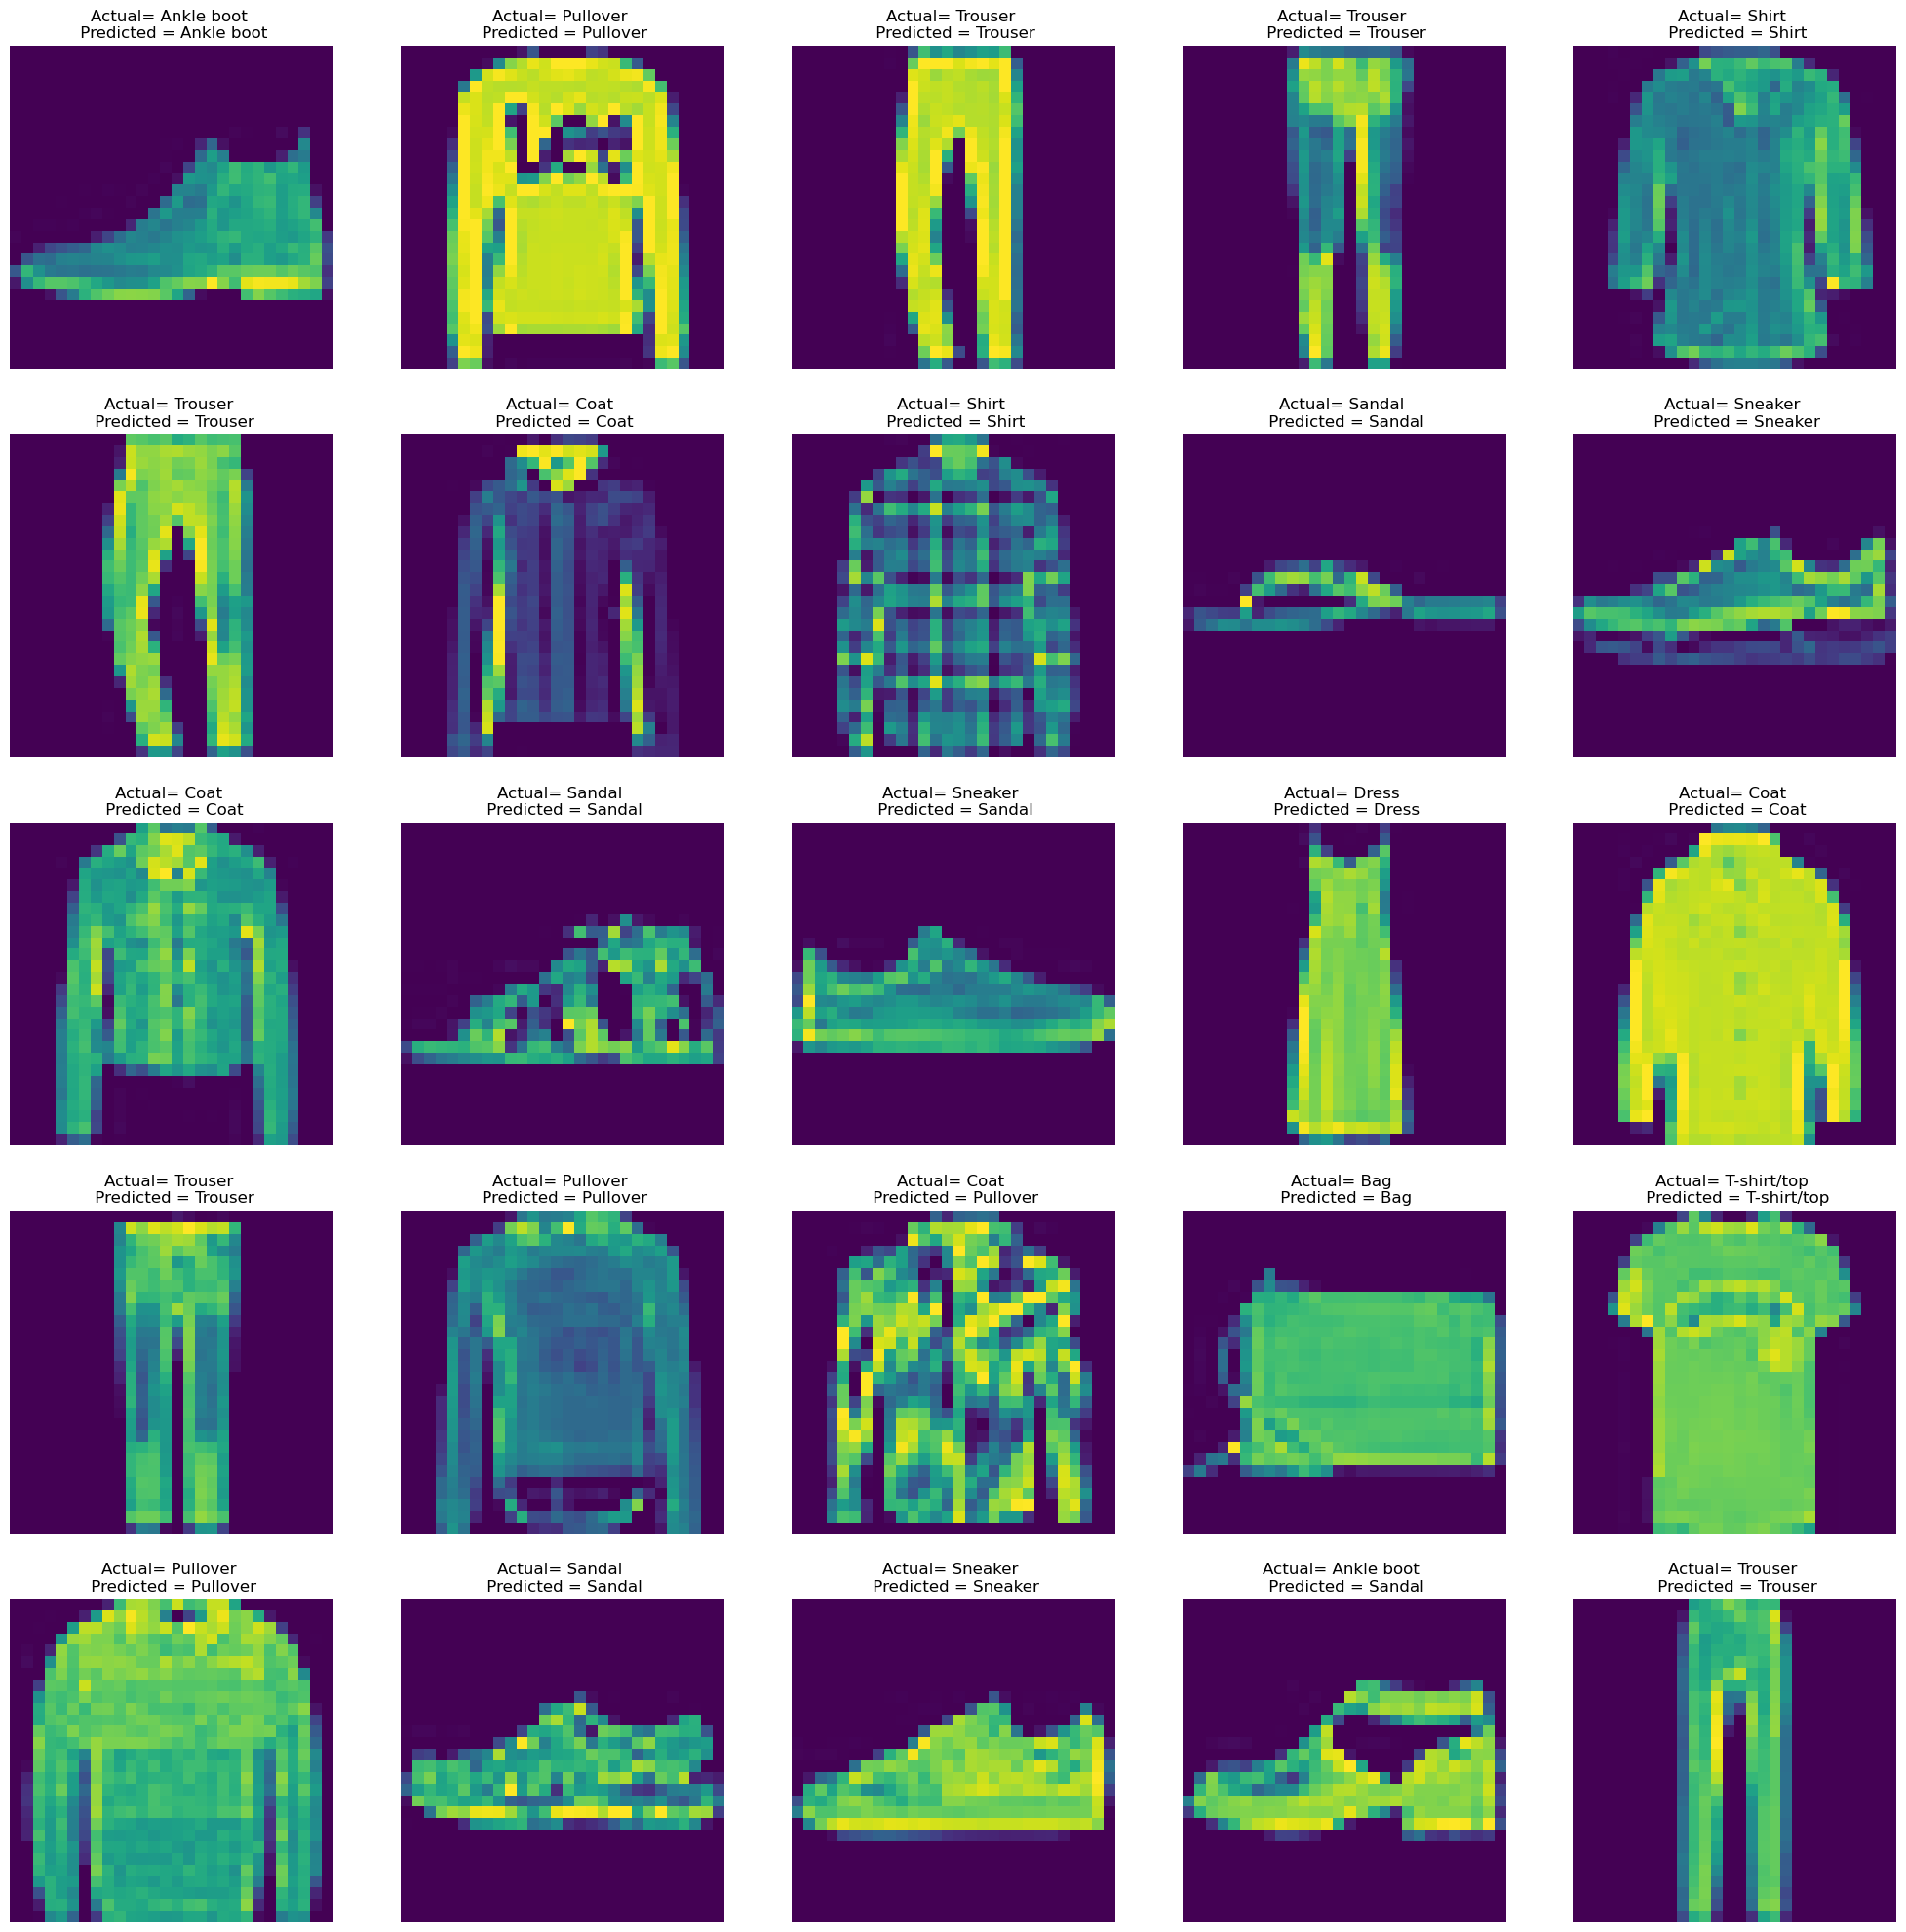

In [68]:
plt.figure(figsize=(25,25))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[y_pred[i]]))

# CONFUSION MATRIX

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[819,   2,  21,  37,   3,   2, 105,   0,  11,   0],
       [  0, 968,   1,  26,   2,   0,   2,   0,   1,   0],
       [ 14,   0, 838,  14,  75,   0,  58,   0,   1,   0],
       [ 13,   2,   9, 912,  28,   1,  31,   0,   4,   0],
       [  1,   1,  92,  35, 817,   1,  51,   0,   2,   0],
       [  0,   0,   0,   0,   0, 956,   0,  29,   2,  13],
       [ 84,   1,  89,  42,  54,   0, 712,   0,  18,   0],
       [  0,   0,   0,   0,   0,  18,   0, 954,   0,  28],
       [  2,   0,   2,   6,   5,   3,   8,   4, 970,   0],
       [  0,   0,   0,   0,   0,   7,   0,  32,   1, 960]], dtype=int64)

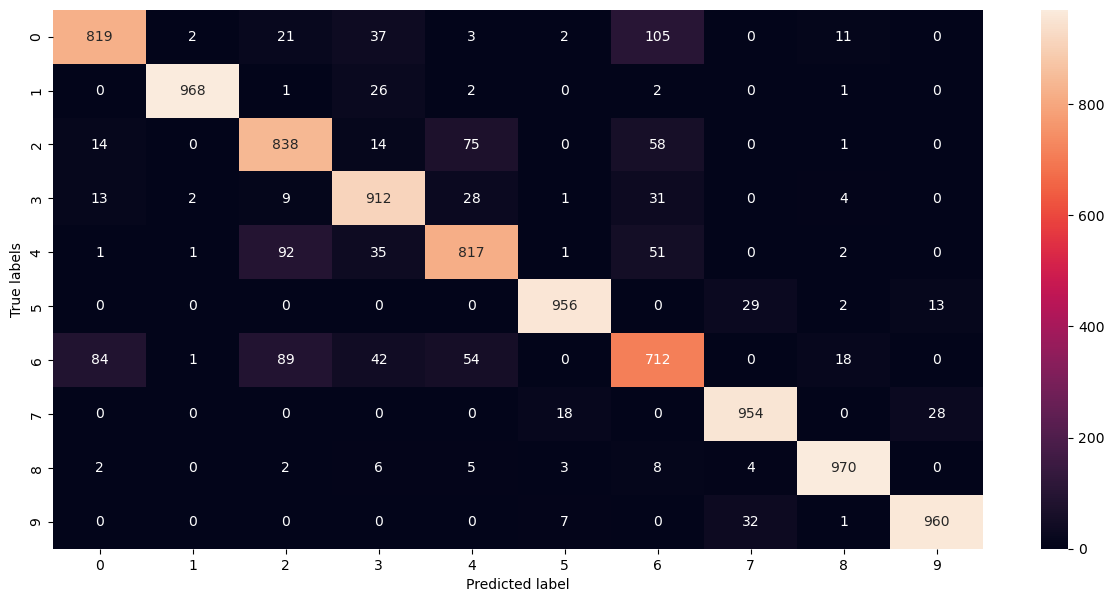

In [70]:
plt.figure(figsize=(15 , 7))
sns.heatmap(cm , annot = True,fmt='d')
plt.ylabel("True labels")
plt.xlabel("Predicted label")
plt.show()

# CLASSIFICATION REPORT

In [71]:
from sklearn.metrics import classification_report
cr = classification_report(y_test , y_pred , target_names = class_labels)

In [72]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.82      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.84      0.82      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.83      0.82      0.82      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.74      0.71      0.72      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# SAVING THE MODEL

In [73]:
## Saving the model
model.save("MNIST_FASHION_CLFF_MODEL.keras")

In [74]:
## loading the model
model = keras.models.load_model("MNIST_FASHION_CLFF_MODEL.keras")

In [75]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[3.1535940e-06, 8.6207399e-07, 1.8453492e-06, ..., 1.5578081e-03,
        1.0488449e-05, 9.9745756e-01],
       [1.2634502e-05, 2.8758695e-09, 9.9866128e-01, ..., 3.6160761e-09,
        1.2520756e-09, 2.8493097e-11],
       [1.1017020e-06, 9.9999845e-01, 1.0048033e-07, ..., 2.2545498e-08,
        1.2735035e-08, 5.2797783e-10],
       ...,
       [1.5338628e-03, 2.6271678e-07, 3.1603340e-04, ..., 8.7931619e-07,
        9.9764061e-01, 4.4715240e-08],
       [3.4358598e-07, 9.9998343e-01, 4.1438565e-07, ..., 3.7534758e-07,
        5.4131217e-08, 5.1592206e-08],
       [3.5142224e-07, 6.5205256e-08, 2.9639616e-06, ..., 1.4539823e-03,
        2.0579979e-05, 2.4524265e-05]], dtype=float32)

# CONCLUSION : A ANN MODEL WITH A TEST ACCURACY OF 89 % IS ACHIEVED